In [2]:
import cv2
import os
from PIL import Image
import numpy as np
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow import keras
from keras.utils import normalize
from keras.models import Sequential
from keras.layers import Conv2D,MaxPooling2D,Activation,Dropout,Flatten,Dense

In [3]:
image_dir='brain_tumor_dataset/'
no_tumor=os.listdir(image_dir+'no/')
yes_tumor=os.listdir(image_dir+'yes/')

In [4]:
dataset=[]
label=[]
INPUT_SIZE=64

In [5]:
# We need the images in jpg formatcso to check that
for i,image_name in enumerate(no_tumor):
    if(image_name.split('.')[1]=='jpg'):
        image=cv2.imread(image_dir+'no/'+image_name)
        #converting to RGB
        image=Image.fromarray(image,'RGB')
        image=image.resize((INPUT_SIZE,INPUT_SIZE))
        dataset.append(np.array(image))
        label.append(0)
        
for i,image_name in enumerate(yes_tumor):
    if(image_name.split('.')[1]=='jpg'):
        image=cv2.imread(image_dir+'yes/'+image_name)
        #converting to RGB
        image=Image.fromarray(image,'RGB')
        image=image.resize((INPUT_SIZE,INPUT_SIZE))
        dataset.append(np.array(image))
        label.append(1)

In [6]:
print(len(label))

3000


In [7]:
dataset=np.array(dataset)
label=np.array(label)

In [8]:
x_train,x_test,y_train,y_test=train_test_split(dataset,label,test_size=0.2,random_state=0)

In [9]:
print(x_train.shape)
print(y_train.shape)

(2400, 64, 64, 3)
(2400,)


In [10]:
print(x_test.shape)
print(y_test.shape)

(600, 64, 64, 3)
(600,)


In [11]:
x_train=normalize(x_train,axis=1)
x_test=normalize(x_test,axis=1)

In [48]:
model=Sequential()
model.add(Conv2D(32,(3,3),input_shape=(INPUT_SIZE,INPUT_SIZE,3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Conv2D(64,(3,3),kernel_initializer='he_uniform'))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Conv2D(64,(3,3),kernel_initializer='he_uniform'))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Flatten())
model.add(Dense(64))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(1))
model.add(Activation('sigmoid'))


In [49]:
model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])

In [64]:
history=model.fit(x_train,y_train,
          batch_size=16,
          verbose=1,
          epochs=10,
          validation_data=(x_test,y_test),
          shuffle=False)

Epoch 1/10
150/150 [==============================] - 7s 44ms/step - loss: 0.0203 - accuracy: 0.9937 - val_loss: 0.0998 - val_accuracy: 0.9783
Epoch 2/10
150/150 [==============================] - 6s 39ms/step - loss: 0.0143 - accuracy: 0.9962 - val_loss: 0.1097 - val_accuracy: 0.9817
Epoch 3/10
150/150 [==============================] - 6s 41ms/step - loss: 0.0105 - accuracy: 0.9962 - val_loss: 0.1020 - val_accuracy: 0.9850
Epoch 4/10
150/150 [==============================] - 7s 46ms/step - loss: 0.0192 - accuracy: 0.9942 - val_loss: 0.0985 - val_accuracy: 0.9800
Epoch 5/10
150/150 [==============================] - 7s 47ms/step - loss: 0.0065 - accuracy: 0.9979 - val_loss: 0.1287 - val_accuracy: 0.9817
Epoch 6/10
150/150 [==============================] - 8s 51ms/step - loss: 0.0022 - accuracy: 1.0000 - val_loss: 0.1162 - val_accuracy: 0.9833
Epoch 7/10
150/150 [==============================] - 7s 48ms/step - loss: 0.0224 - accuracy: 0.9954 - val_loss: 0.1556 - val_accuracy: 0.9467

In [65]:
model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_10 (Conv2D)          (None, 62, 62, 32)        896       
                                                                 
 activation_18 (Activation)  (None, 62, 62, 32)        0         
                                                                 
 max_pooling2d_10 (MaxPoolin  (None, 31, 31, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_11 (Conv2D)          (None, 29, 29, 64)        18496     
                                                                 
 activation_19 (Activation)  (None, 29, 29, 64)        0         
                                                                 
 max_pooling2d_11 (MaxPoolin  (None, 14, 14, 64)       0         
 g2D)                                                 

In [66]:
model.save('Brain_Tumor_with_binarycrossentropy.h5')

In [67]:
#Now predicting using the Prediction data given
from keras.models import load_model

model=load_model('Brain_Tumor_with_binarycrossentropy.h5')

In [68]:
img=cv2.imread('brain_tumor_dataset/pred/pred5.jpg')

In [69]:
img=Image.fromarray(img)
img=img.resize((64,64))
img=np.array(img)

In [70]:
input_img=np.expand_dims(img,axis=0)

In [71]:
result = model.predict(input_img)
print(result)

1/1 [==============================] - 0s 80ms/step
[[1.]]


<function matplotlib.pyplot.show(close=None, block=None)>

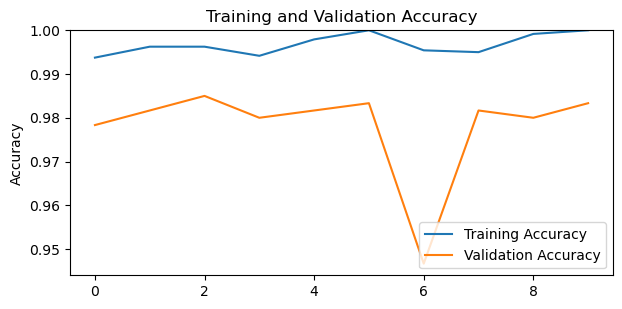

In [84]:
import matplotlib.pyplot as plt
import seaborn as sns

epochs=10
acc=history.history['accuracy']
val_acc=history.history['val_accuracy']

fig=plt.figure(figsize=(7,7))
plt.subplot(2, 1, 1)
plt.plot(acc, label='Training Accuracy')
plt.plot(val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.ylabel('Accuracy')
plt.ylim([min(plt.ylim()),1])
plt.title('Training and Validation Accuracy')
plt.show